# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# import time
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Total cities picked initially - {len(cities)}")

Total cities picked initially - 631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# URL to fetch weather information
url = "http://api.openweathermap.org/data/2.5/weather?"
# Setting unit type
units = "Imperial"

# Building partial query URL
query_url = f"{url}appid={api_keys.api_key}&units={units}&q="

# Defining Dataframe to capture data
city_weather_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])

# Setting counter
batch_size = 0
batch_num  = 1

# Data retrieval

print("Beginning Data Retrieval")
print("----------------------------------")

for city in cities:
    try:
        # Requesting data
        response = requests.get(query_url + city).json()
  
        # Preparing record
        city_rec = {"City":city,
                    "Cloudiness":response["clouds"]["all"],
                    "Country":response["sys"]["country"],
                    "Date":response["dt"],
                    "Humidity":response["main"]["humidity"],
                    "Lat":response["coord"]["lat"],
                    "Lng":response["coord"]["lon"],
                    "Max Temp":response["main"]["temp_max"],
                    "Wind Speed":response["wind"]["speed"]
                   }
        
        # Appending row to dataset
        city_weather_df = city_weather_df.append(city_rec, ignore_index=True)
        
        # Increase batch counter
        batch_size += 1
        
        print(f"Processing Record {batch_size} of Set {batch_num} | {city}")
        
        # Reset counter once batch size is 50
        if batch_size == 50:
            batch_size = 0
            batch_num += 1
            
    except:
        print("City not found. Skipping...")
    

print("---------------------------------")
print("Data retrieval complete")
print("---------------------------------")


Beginning Data Retrieval
----------------------------------
Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | ovalle
Processing Record 7 of Set 1 | yar-sale
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | port-cartier
Processing Record 14 of Set 1 | tamale
Processing Record 15 of Set 1 | aljezur
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | ixtapa
Processing Record 18 of Set 1 | biak
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | lagoa
City not found. Skipping...
Processing Record 22 of Set 1 | college


Processing Record 37 of Set 4 | tashara
Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | avera
Processing Record 41 of Set 4 | cordoba
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | straumen
Processing Record 44 of Set 4 | sirjan
Processing Record 45 of Set 4 | okhotsk
Processing Record 46 of Set 4 | horsham
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | arlit
Processing Record 49 of Set 4 | santa cruz
City not found. Skipping...
Processing Record 50 of Set 4 | alghero
Processing Record 1 of Set 5 | natal
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | barabai
Processing Record 4 of Set 5 | peniche
Processing Record 5 of Set 5 | salcuta
Processing Record 6 of Set 5 | denpasar
Processing Record 7 of Set 5 | yaan
Processing Record 8 of Set 5 | richards bay
Processing Record 9 of Set 5 | bilma
Processing Record 10 of Set 5 | the valley
Processing Record 

Processing Record 22 of Set 8 | goundam
Processing Record 23 of Set 8 | murbad
Processing Record 24 of Set 8 | hirara
Processing Record 25 of Set 8 | masumbwe
Processing Record 26 of Set 8 | rocky mountain house
City not found. Skipping...
Processing Record 27 of Set 8 | luderitz
Processing Record 28 of Set 8 | millville
Processing Record 29 of Set 8 | jalu
Processing Record 30 of Set 8 | bandarbeyla
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | monrovia
Processing Record 33 of Set 8 | saint-ambroise
Processing Record 34 of Set 8 | pisco
City not found. Skipping...
Processing Record 35 of Set 8 | vanavara
Processing Record 36 of Set 8 | carmen
City not found. Skipping...
Processing Record 37 of Set 8 | requena
Processing Record 38 of Set 8 | seddon
Processing Record 39 of Set 8 | inuvik
Processing Record 40 of Set 8 | osypenko
Processing Record 41 of Set 8 | faya
Processing Record 42 of Set 8 | san cristobal
Processing Record 43 of Set 8 | ruteng
City not fou

Processing Record 7 of Set 12 | meulaboh
Processing Record 8 of Set 12 | ayan
Processing Record 9 of Set 12 | byron bay
Processing Record 10 of Set 12 | umm kaddadah
Processing Record 11 of Set 12 | nantucket
Processing Record 12 of Set 12 | blagoyevo
City not found. Skipping...
Processing Record 13 of Set 12 | fortuna
Processing Record 14 of Set 12 | bosaso
Processing Record 15 of Set 12 | kijang
Processing Record 16 of Set 12 | kovdor
Processing Record 17 of Set 12 | klyuchi
Processing Record 18 of Set 12 | ocos
Processing Record 19 of Set 12 | karpogory
Processing Record 20 of Set 12 | sovetskiy
---------------------------------
Data retrieval complete
---------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Checking dataframe data after the api call (cities with no information from api call are not in this list)
print(city_weather_df.count())

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64


In [8]:
# Saving data to csv file
city_weather_df.to_csv(output_data_file)

# Displaying data from dataframe
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,poum,0,MK,1546915664,60,41.28,20.71,-9.25,2.01
1,cape town,0,ZA,1546912800,72,-33.93,18.42,64.40,19.46
2,sitka,0,US,1546915664,35,37.17,-99.65,43.81,9.28
3,puerto ayora,0,EC,1546915664,100,-0.74,-90.35,75.58,9.17
4,codrington,40,AU,1546912800,61,-28.95,153.24,82.40,8.05


Latitude vs. Temperature Plot

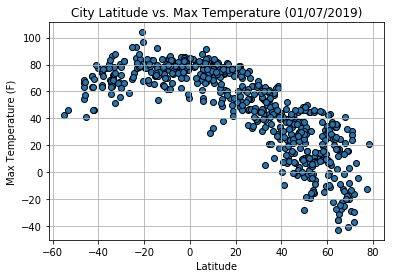

In [9]:
## Retrieving today's date with required format

d = datetime.datetime.now()

# Month
todays_month = '{message:{fill}{align}{width}}'.format(
                                                        message=str(d.month),
                                                        fill='0',
                                                        align='>',
                                                        width=2,
                                                       )
# Day
todays_day = '{message:{fill}{align}{width}}'.format(
                                                        message=str(d.day),
                                                        fill='0',
                                                        align='>',
                                                        width=2,
                                                       )
# Date
todays_date = todays_month + "/" + todays_day + "/" + str(d.year)

# Scatter plot - Latitue vs. Max Temp
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"],edgecolors = 'black')

# Setting plot title with todays_date, labels for x and y axis, showing grid
plt.title("City Latitude vs. Max Temperature (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Saving plt figure
plt.savefig('output_data/Lat_MaxTemp.png')

#### Latitude vs. Humidity Plot

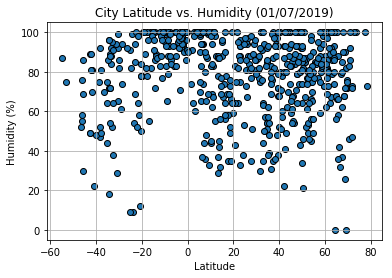

In [10]:
# Scatter plot - Latitude vs. Humidity
plt.scatter(city_weather_df["Lat"],city_weather_df["Humidity"],edgecolors = 'black')

# Setting plot title with todays_date, labels for x and y axis, showing grid
plt.title("City Latitude vs. Humidity (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving plt figure
plt.savefig('output_data/Lat_Humidity.png')

#### Latitude vs. Cloudiness Plot

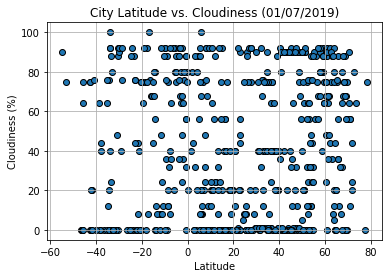

In [11]:
# Scatter plot - Latitude vs. Cloudiness
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"],edgecolors = 'black')

# Setting plot title with todays_date, labels for x and y axis, showing grid
plt.title("City Latitude vs. Cloudiness (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving plt figure
plt.savefig('output_data/Lat_Cloud.png')

#### Latitude vs. Wind Speed Plot

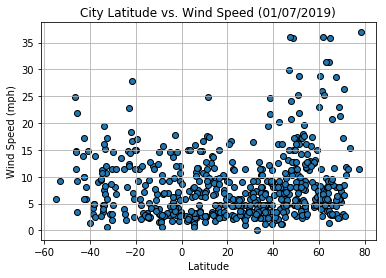

In [12]:
# Scatter plot - Latitude vs. Wind Speed
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"],edgecolors = 'black')

# Setting plot title with todays_date, labels for x and y axis, showing grid
plt.title("City Latitude vs. Wind Speed (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Saving plt figure
plt.savefig('output_data/Lat_WS.png')